In [281]:
# import librarties
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [282]:
# set matploblib syling to seaborn
plt.style.use('seaborn') # deprecated

rcParams['axes.titlepad'] = 15
rcParams['axes.labelpad'] = 15
rcParams['axes.titlesize'] = 10
rcParams['axes.labelsize'] = 10
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'

In [283]:
# set directories
dir = os.getcwd()
folder = 'data'
path = os.path.join(dir, folder)

# read data
filename = 'data-tagging.csv'
filepath = os.path.join(path, filename)

In [284]:
# read data
df = pd.read_csv(filepath)

# check data
df.head()

,id,kalimat,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi,artikel,observasi
0,1.0,Dok kemarin malam tiba-tiba anak saya usia 6 t...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,baru malam ini panas dingin.,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,obatnya apa ya dok?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,mohon bantuannya ya terima kasih,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,"Alo, Terima kasih atas pertanyaannya.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
# trim all columns name
df.columns = df.columns.str.strip()

In [286]:
# drop id column
df.drop('id', axis=1, inplace=True)

# change nan to 0
df.fillna(0, inplace=True)

# check data
df.head()

,kalimat,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi,artikel,observasi
0,Dok kemarin malam tiba-tiba anak saya usia 6 t...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,baru malam ini panas dingin.,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,obatnya apa ya dok?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,mohon bantuannya ya terima kasih,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Alo, Terima kasih atas pertanyaannya.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
# print data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   kalimat      1125 non-null   object 
 1   pasien       1125 non-null   float64
 2   usia pasien  1125 non-null   float64
 3   penyakit     1125 non-null   float64
 4   gejala       1125 non-null   float64
 5   kapan        1125 non-null   float64
 6   periode      1125 non-null   float64
 7   tindakan     1125 non-null   float64
 8   outcome      1125 non-null   float64
 9   pertanyaan   1125 non-null   float64
 10  pembuka      1125 non-null   float64
 11  penyebab     1125 non-null   float64
 12  prakondisi   1125 non-null   float64
 13  objek        1125 non-null   float64
 14  penutup      1125 non-null   float64
 15  referensi    1125 non-null   float64
 16  artikel      1125 non-null   float64
 17  observasi    1125 non-null   float64
dtypes: float64(17), object(1)
memory usage: 158.3+ K

In [288]:
# for all column except kalimat change data type to int
for item in df.columns:
    if item != 'kalimat':
        df[item] = df[item].astype(int)

# check data
df.head()

,kalimat,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi,artikel,observasi
0,Dok kemarin malam tiba-tiba anak saya usia 6 t...,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,baru malam ini panas dingin.,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,obatnya apa ya dok?,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,mohon bantuannya ya terima kasih,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Alo, Terima kasih atas pertanyaannya.",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [289]:
# print sum of each column except kalimat
print(df[df.columns[1:]].sum())

pasien          48
usia pasien     30
penyakit       134
gejala         114
kapan           46
periode         46
tindakan       475
outcome         67
pertanyaan      78
pembuka         59
penyebab       168
prakondisi     143
objek          162
penutup         75
referensi       15
artikel          1
observasi       57
dtype: int64


In [290]:
# drop row where observation is 1
df = df[df['observasi'] == 0]
df = df[df['artikel'] == 0]

# remove observation column
df.drop('observasi', axis=1, inplace=True)
df.drop('artikel', axis=1, inplace=True)

# drop row with total column value is 0
df = df[df[df.columns[1:]].sum(axis=1) != 0]

In [291]:
df.head(10)

,kalimat,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi
0,Dok kemarin malam tiba-tiba anak saya usia 6 t...,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,baru malam ini panas dingin.,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,obatnya apa ya dok?,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,"Alo, Terima kasih atas pertanyaannya.",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,Batuk dan flu dan panas dingin dapat disebabka...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
6,Berdasarkan dari riwayat keluhan yang Anda sam...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
8,"Namun, apabila keluhan tidak membaik dalam 2-3...",0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
9,"keluhan disertai dengan demam tinggi, sesak n...",0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
10,Dokter akan melakukan evaluasi lebih lanjut te...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11,dan memberikan terapi yang sesuai.,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1124
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   kalimat      1000 non-null   object
 1   pasien       1000 non-null   int32 
 2   usia pasien  1000 non-null   int32 
 3   penyakit     1000 non-null   int32 
 4   gejala       1000 non-null   int32 
 5   kapan        1000 non-null   int32 
 6   periode      1000 non-null   int32 
 7   tindakan     1000 non-null   int32 
 8   outcome      1000 non-null   int32 
 9   pertanyaan   1000 non-null   int32 
 10  pembuka      1000 non-null   int32 
 11  penyebab     1000 non-null   int32 
 12  prakondisi   1000 non-null   int32 
 13  objek        1000 non-null   int32 
 14  penutup      1000 non-null   int32 
 15  referensi    1000 non-null   int32 
dtypes: int32(15), object(1)
memory usage: 74.2+ KB


In [293]:
df.describe()

,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.048000,0.02900,0.129000,0.109000,0.045000,0.04600,0.467000,0.062000,0.078000,0.059000,0.156000,0.143000,0.156000,0.075000,0.014000
std,0.213873,0.16789,0.335368,0.311795,0.207408,0.20959,0.499159,0.241276,0.268306,0.235743,0.363037,0.350248,0.363037,0.263523,0.117549
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [311]:
# print total sums of all rows
print(df[df.columns[1:]].sum(axis=1).sum())

1616


In [294]:
# import libary for machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

In [295]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hiday\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [296]:
# set columns
columns = df.columns[1:]
print(columns)

Index(['pasien', 'usia pasien', 'penyakit', 'gejala', 'kapan', 'periode',
       'tindakan', 'outcome', 'pertanyaan', 'pembuka', 'penyebab',
       'prakondisi', 'objek', 'penutup', 'referensi'],
      dtype='object')


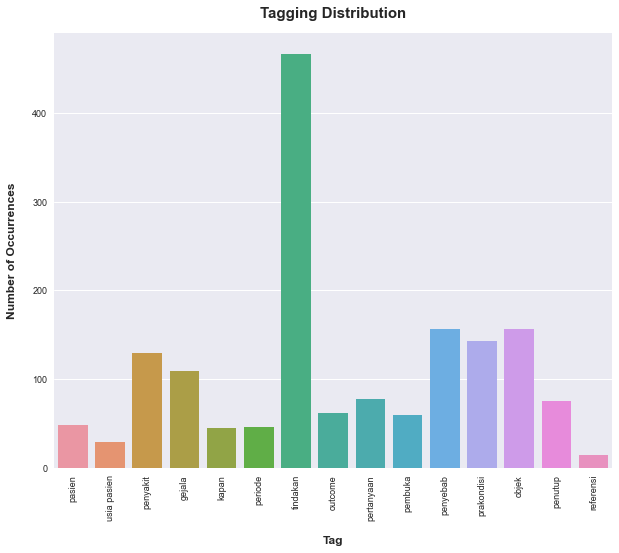

In [297]:
# countplot for each columns
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x=columns, y=df[columns].sum().values)
plt.title("Tagging Distribution", fontsize=15)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tag', fontsize=12)
plt.xticks(rotation=90)

plt.show()

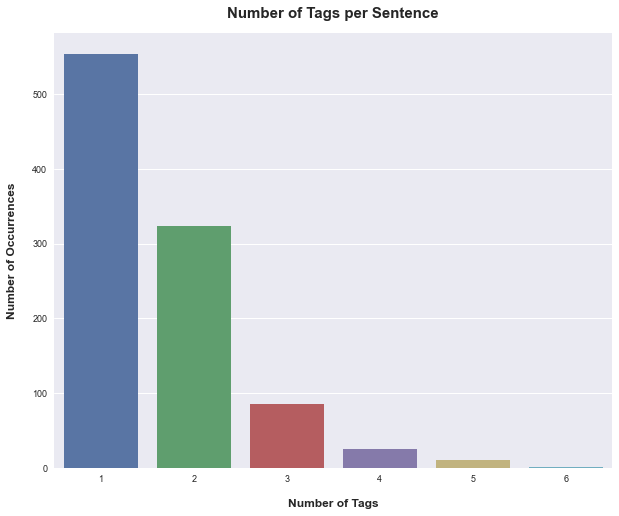

In [298]:
# row with sum > 1
temp = df.iloc[:,1:].sum(axis=1).value_counts()

# plot
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x=temp.index, y=temp.values)
plt.title("Number of Tags per Sentence", fontsize=15)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Tags', fontsize=12)

plt.show()

In [299]:
print(temp)

1    554
2    324
3     86
4     25
5     10
6      1
dtype: int64


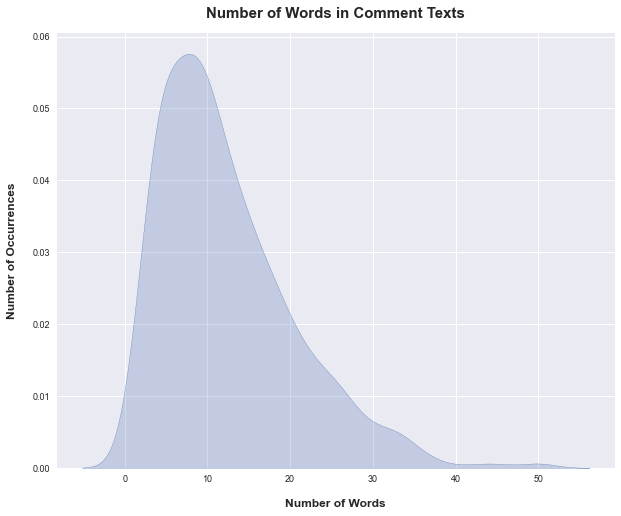

In [300]:
# The distribution of the number of words in comment texts.
fig, ax = plt.subplots(figsize=(10, 8))

sns.kdeplot(df['kalimat'].str.split().map(lambda x: len(x)), fill=True)
plt.title("Number of Words in Comment Texts", fontsize=15)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Words', fontsize=12)

plt.show()

In [301]:
# average number of words in kalimat
print('Average number of words in kalimat: {}'.format(df['kalimat'].str.split().map(lambda x: len(x)).mean()))

Average number of words in kalimat: 12.375


In [302]:
# check if theres any empty string
df[df['kalimat'] == '']

,kalimat,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi


### NLTK Processing

In [303]:
import re

# remove punctuation
df['kalimat'] = df['kalimat'].apply(lambda x: re.sub(r'[^\w\s]','',x))

# lowercasing 
df['kalimat'] = df['kalimat'].apply(lambda x: x.lower())

# nomralize whitespace
df['kalimat'] = df['kalimat'].apply(lambda x: re.sub(r'\s+', ' ', x))

# clean text indonesia
def clean_text(string: str) -> str:
    string = re.sub(r'\byg\b', 'yang', string)
    
    # gk -> tidak
    string = re.sub(r'\bgk\b', 'tidak', string)

    # gak -> tidak
    string = re.sub(r'\bgak\b', 'tidak', string)

    # ga -> tidak
    string = re.sub(r'\bga\b', 'tidak', string)

    # klo -> kalau
    string = re.sub(r'\bklo\b', 'kalau', string)

    # kl -> kalau
    string = re.sub(r'\bkl\b', 'kalau', string)

    # kalo -> kalau
    string = re.sub(r'\bkalo\b', 'kalau', string)

    # tsb -> tersebut
    string = re.sub(r'\btsb\b', 'tersebut', string)

    return string

# clean text
df['kalimat'] = df['kalimat'].apply(clean_text)

# check data
df.head(20)

,kalimat,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi
0,dok kemarin malam tibatiba anak saya usia 6 ta...,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,baru malam ini panas dingin,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,obatnya apa ya dok,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,alo terima kasih atas pertanyaannya,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,batuk dan flu dan panas dingin dapat disebabka...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
6,berdasarkan dari riwayat keluhan yang anda sam...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
8,namun apabila keluhan tidak membaik dalam 23 h...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
9,keluhan disertai dengan demam tinggi sesak na...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
10,dokter akan melakukan evaluasi lebih lanjut te...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11,dan memberikan terapi yang sesuai,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [304]:
# split data into train and test
train, test = train_test_split(df, random_state=42, test_size=0.30, shuffle=True)

X_train = train['kalimat']
X_test = test['kalimat']
print(X_train.shape, X_test.shape)

(700,) (300,)


In [305]:
stop_words = [word for word in stop_words if '-' not in word]

In [306]:
# multilabel-indicator score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [307]:
def print_score(NB_pipeline: Pipeline) -> None:
    '''
    Function to print the scores of the model
    '''
    for item in columns:
        print('Processing {}'.format(item))
        NB_pipeline.fit(X_train, train[item])
        prediction = NB_pipeline.predict(X_test)

        print('F1 score is {}'.format(f1_score(test[item], prediction, average='weighted')))
        print('Precision score is {}'.format(precision_score(test[item], prediction, average='weighted', zero_division=0)))
        print('Recall score is {}'.format(recall_score(test[item], prediction, average='weighted')))
        print('Test accuracy is {}'.format(accuracy_score(test[item], prediction)))
        print()

In [308]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
print_score(NB_pipeline)

Processing pasien
F1 score is 0.9109278350515463
Precision score is 0.8835999999999999
Recall score is 0.94
Test accuracy is 0.94

Processing usia pasien
F1 score is 0.9404081632653061
Precision score is 0.9216000000000001
Recall score is 0.96
Test accuracy is 0.96

Processing penyakit
F1 score is 0.8444797178130511
Precision score is 0.8033892617449664
Recall score is 0.89
Test accuracy is 0.89

Processing gejala
F1 score is 0.8478148799062684
Precision score is 0.804011111111111
Recall score is 0.8966666666666666
Test accuracy is 0.8966666666666666

Processing kapan
F1 score is 0.9354798409994323
Precision score is 0.9152111111111111
Recall score is 0.9566666666666667
Test accuracy is 0.9566666666666667

Processing periode
F1 score is 0.9404081632653061
Precision score is 0.9216000000000001
Recall score is 0.96
Test accuracy is 0.96

Processing tindakan
F1 score is 0.8669043798656921
Precision score is 0.8690676270508205
Recall score is 0.8666666666666667
Test accuracy is 0.866666666

In [309]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
print_score(SVC_pipeline)

Processing pasien
F1 score is 0.9556173913043478
Precision score is 0.9647098976109214
Recall score is 0.9633333333333334
Test accuracy is 0.9633333333333334

Processing usia pasien
F1 score is 0.9767697594501719
Precision score is 0.980408163265306
Recall score is 0.98
Test accuracy is 0.98

Processing penyakit
F1 score is 0.8907705950164052
Precision score is 0.8915718283582089
Recall score is 0.89
Test accuracy is 0.89

Processing gejala
F1 score is 0.912853717026379
Precision score is 0.9216170821048871
Recall score is 0.9266666666666666
Test accuracy is 0.9266666666666666

Processing kapan
F1 score is 0.9354798409994323
Precision score is 0.9152111111111111
Recall score is 0.9566666666666667
Test accuracy is 0.9566666666666667

Processing periode
F1 score is 0.9640036323277167
Precision score is 0.9659661016949154
Recall score is 0.97
Test accuracy is 0.97

Processing tindakan
F1 score is 0.8436280719721848
Precision score is 0.8470888888888889
Recall score is 0.8433333333333334
T

In [310]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
print_score(LogReg_pipeline)

Processing pasien
F1 score is 0.9188114865476945
Precision score is 0.9465551839464884
Recall score is 0.9433333333333334
Test accuracy is 0.9433333333333334

Processing usia pasien
F1 score is 0.9404081632653061
Precision score is 0.9216000000000001
Recall score is 0.96
Test accuracy is 0.96

Processing penyakit
F1 score is 0.8791858650184179
Precision score is 0.8909084999187388
Recall score is 0.9066666666666666
Test accuracy is 0.9066666666666666

Processing gejala
F1 score is 0.8478148799062684
Precision score is 0.804011111111111
Recall score is 0.8966666666666666
Test accuracy is 0.8966666666666666

Processing kapan
F1 score is 0.9354798409994323
Precision score is 0.9152111111111111
Recall score is 0.9566666666666667
Test accuracy is 0.9566666666666667

Processing periode
F1 score is 0.9404081632653061
Precision score is 0.9216000000000001
Recall score is 0.96
Test accuracy is 0.96

Processing tindakan
F1 score is 0.8635664151181758
Precision score is 0.86535343651782
Recall sc